In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 正常输出中文
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'

读取数据

In [51]:
# 读取数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

查看数据

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [54]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


计算各个数据的缺失率

In [58]:
# 计算Age的缺失率
print('Percent of missing "Age" records is %.2f%%' %((train_data['Age'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Age" records is 19.87%


In [59]:
# 'Cabin'字段的缺失率
print('Percent of missing "Cabin" records is %.2f%%' % ((train_data['Cabin'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [60]:
# 'Embarked'的缺失率
print('Percent of missing "Embarked" records is %.2f%%' % ((train_data['Embarked'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [61]:
# 'Sex'的缺失率
print('Percent of missing "Sex" records is %.2f%%' % ((train_data['Sex'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Sex" records is 0.00%


In [62]:
# 'Fare'的缺失率
print('Percent of missing "Fare" records is %.2f%%' % ((train_data['Fare'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Fare" records is 0.00%


In [63]:
# 'SibSp'和'Parch'的缺失率
print('Percent of missing "SibSp" records is %.2f%%' % ((train_data['SibSp'].isnull().sum()/train_data.shape[0])*100))
print('Percent of missing "Parch" records is %.2f%%' % ((train_data['Parch'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "SibSp" records is 0.00%
Percent of missing "Parch" records is 0.00%


缺失值处理


In [64]:
# 对缺失值处理
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) # 缺失率较低，所以用平均值填充
train_data.drop(['Cabin'],axis=1,inplace=True) # 因为缺失率太高，所以直接删去Cabin的那一列数据
train_data.Embarked = train_data.Embarked.fillna('S') # 用’S'填补缺失值
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


数据分析

C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\2885841231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Pclass', y='Survived', data=train_data, kind='bar', height=4, aspect=2, palette='GnBu_d')


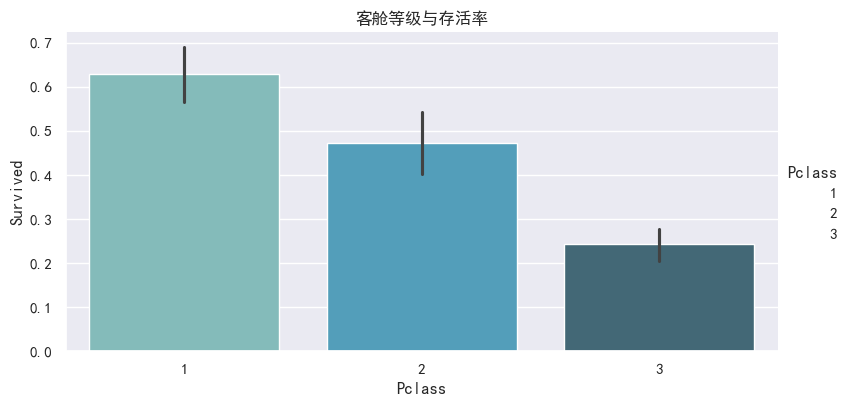

In [65]:
# Survived 与 Pclass 的关系
import seaborn as sns

# 绘制客舱等级与存活率的柱状图
sns.catplot(x='Pclass', y='Survived', data=train_data, kind='bar', height=4, aspect=2, palette='GnBu_d')
plt.title('客舱等级与存活率')

plt.show()

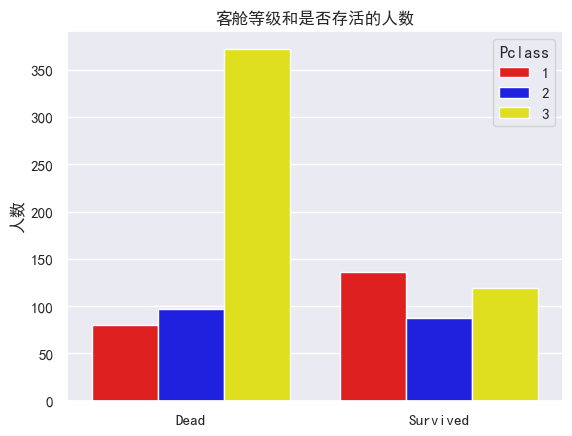

In [66]:
import seaborn as sns

# 绘制客舱等级和是否存活的人数的柱状图
sns.countplot(x='Survived', hue='Pclass', data=train_data, palette=['red', 'blue', 'yellow'])
plt.xticks([0, 1], ['Dead', 'Survived'])
plt.xlabel(None)
plt.ylabel('人数')
plt.title('客舱等级和是否存活的人数')

plt.show()  # level：1>2>3

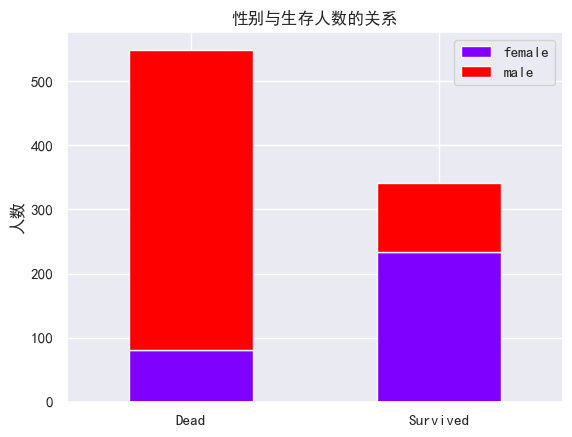

In [67]:
# Survived 与 Sex 的关系
Survived_Sex = train_data['Sex'].groupby(train_data['Survived'])

# 统计各个组合的数量并展开成表格
survived_sex_counts = Survived_Sex.value_counts().unstack()

# 绘制堆叠柱状图
ax = survived_sex_counts.plot(kind='bar', stacked=True, colormap='rainbow', rot=0)

plt.xlabel(None)
plt.ylabel('人数')
plt.title('性别与生存人数的关系')
plt.xticks([0, 1], ['Dead', 'Survived'])

plt.legend(['female', 'male'], loc='upper right')
plt.show()

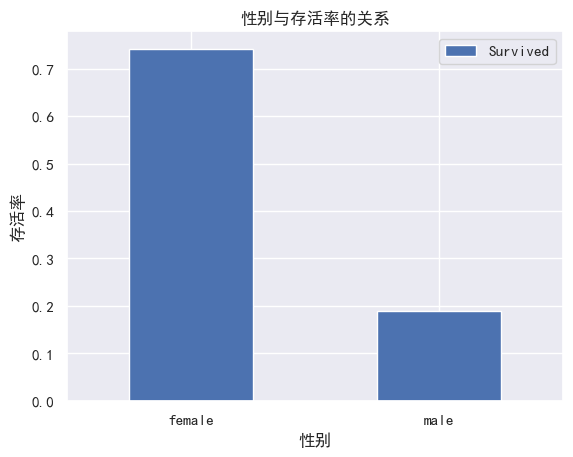

女性的存活率为74.20%，男性的存活率为18.89%


In [68]:
# 绘制柱状图
ax = train_data[['Sex','Survived']].groupby('Sex').mean().plot.bar()

survive_sex = train_data.groupby(['Sex','Survived'])['Survived'].count()
female_survival_rate = survive_sex.loc['female',1] / survive_sex.loc['female'].sum() * 100
male_survival_rate = survive_sex.loc['male',1] / survive_sex.loc['male'].sum() * 100

plt.xlabel('性别')
plt.ylabel('存活率')
plt.title('性别与存活率的关系')

labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_xticklabels(labels, rotation=0)

plt.show()

print('女性的存活率为%.2f%%，男性的存活率为%.2f%%' %
     (survive_sex.loc['female',1]/survive_sex.loc['female'].sum()*100,
      survive_sex.loc['male',1]/survive_sex.loc['male'].sum()*100)
    )

C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\3911641904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Age', y='Survived', data=average_age, palette='BuPu')


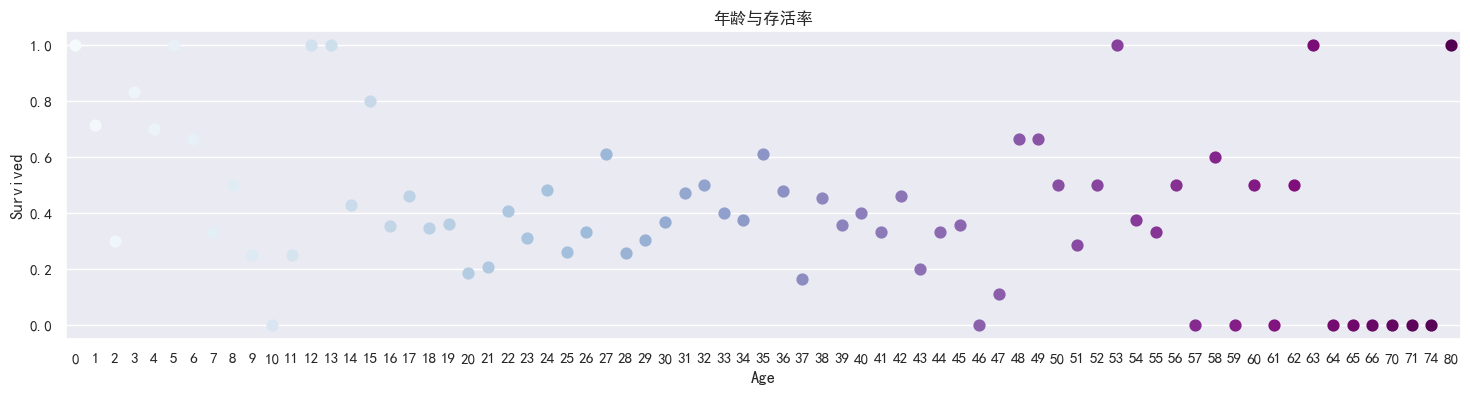

In [69]:
# Survived 与 Age 的关系
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,4))
train_data['Age'] = train_data['Age'].astype(int)
average_age = train_data[['Age', 'Survived']].groupby('Age', as_index=False).mean()

sns.pointplot(x='Age', y='Survived', data=average_age, palette='BuPu')
plt.title('年龄与存活率')
plt.show()


C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\883346262.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data[train_data['SibSp'] != 0], palette='Oranges')
C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\883346262.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data[train_data['SibSp'] == 0], palette='YlGn')
C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\883346262.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data[train_data['Parch'] != 0], pa

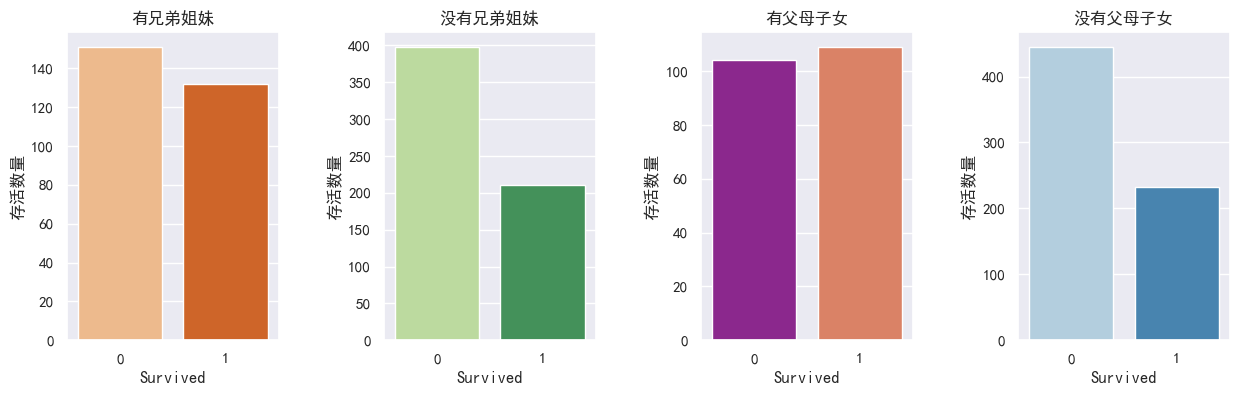

In [70]:
# Survived 与 SibSp、Parch 的关系
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 绘制有兄弟姐妹的存活情况的柱形图
plt.subplot(141)
sns.countplot(x='Survived', data=train_data[train_data['SibSp'] != 0], palette='Oranges')
plt.title('有兄弟姐妹')
plt.ylabel('存活数量')

# 绘制没有兄弟姐妹的存活情况的柱形图
plt.subplot(142)
sns.countplot(x='Survived', data=train_data[train_data['SibSp'] == 0], palette='YlGn')
plt.title('没有兄弟姐妹')
plt.ylabel('存活数量')

# 绘制有父母子女的存活情况的柱形图
plt.subplot(143)
sns.countplot(x='Survived', data=train_data[train_data['Parch'] != 0], palette='plasma')
plt.title('有父母子女')
plt.ylabel('存活数量')

# 绘制没有父母子女的存活情况的柱形图
plt.subplot(144)
sns.countplot(x='Survived', data=train_data[train_data['Parch'] == 0], palette='Blues')
plt.title('没有父母子女')
plt.ylabel('存活数量')

plt.show()


C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\1583668409.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=train_data,ax=ax[0], ci=None)
C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\1583668409.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=train_data, ax=ax[1], ci=None)


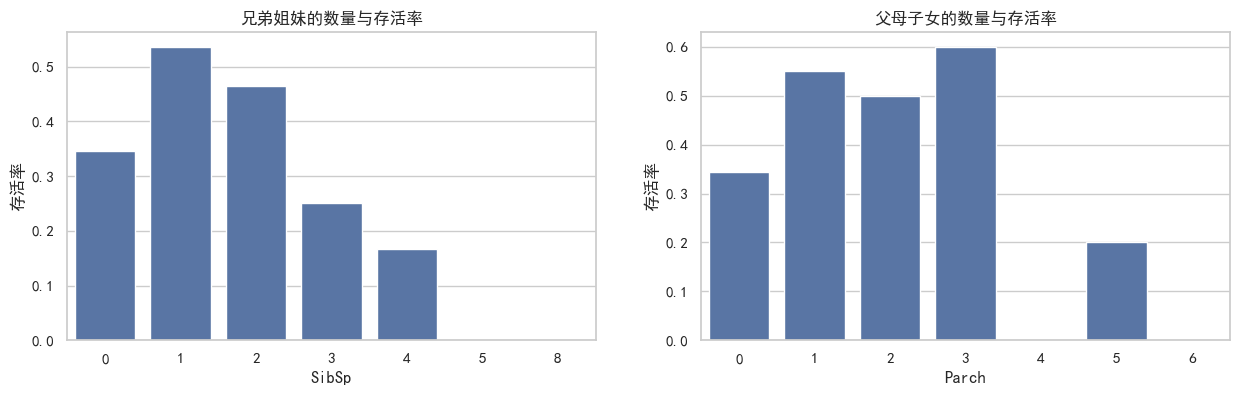

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font='SimHei')

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x='SibSp', y='Survived', data=train_data,ax=ax[0], ci=None)
ax[0].set_title('兄弟姐妹的数量与存活率')
ax[0].set_ylabel('存活率')

sns.barplot(x='Parch', y='Survived', data=train_data, ax=ax[1], ci=None)
ax[1].set_title('父母子女的数量与存活率')
ax[1].set_ylabel('存活率')

plt.show()


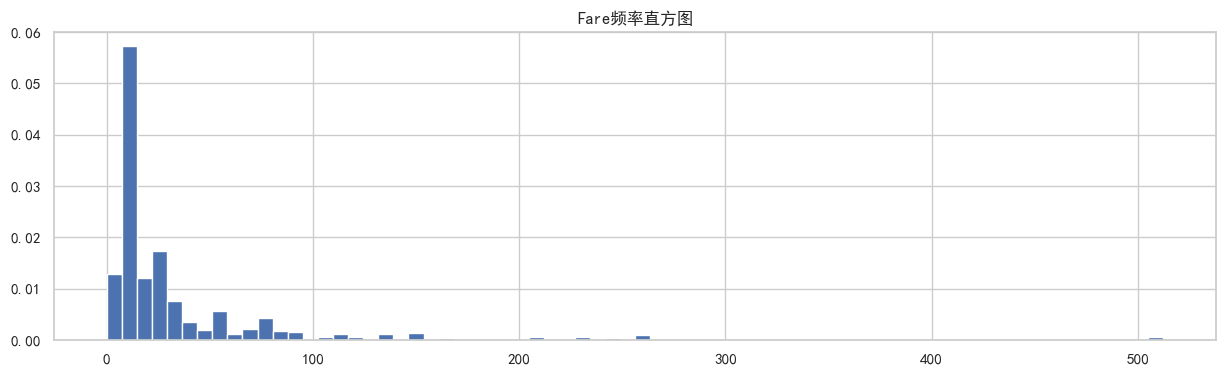

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(15, 4))
sns.set(font='SimHei')

# 绘制Fare的频率直方图
n, bins, patches = ax.hist(train_data['Fare'], bins=70, density=True)

ax.set_title('Fare频率直方图')

plt.show()

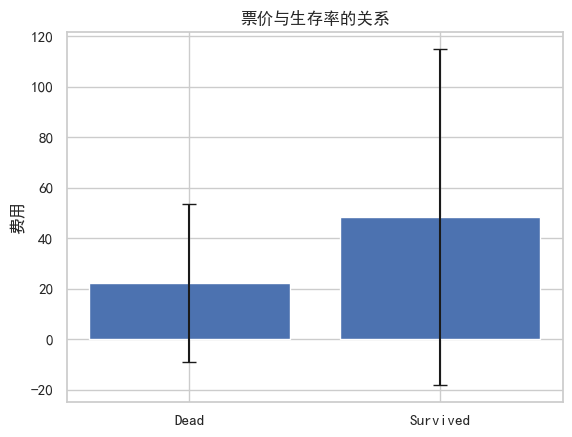

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

data = train_data[['Fare', 'Survived']]

fare_survived = data.groupby(['Survived'])['Fare']
mean = fare_survived.mean()
std = fare_survived.std()

fig, ax = plt.subplots()
ax.bar(['Dead', 'Survived'], mean, yerr=std, capsize=5)
ax.set_ylabel('费用')
ax.set_title('票价与生存率的关系')

plt.show()

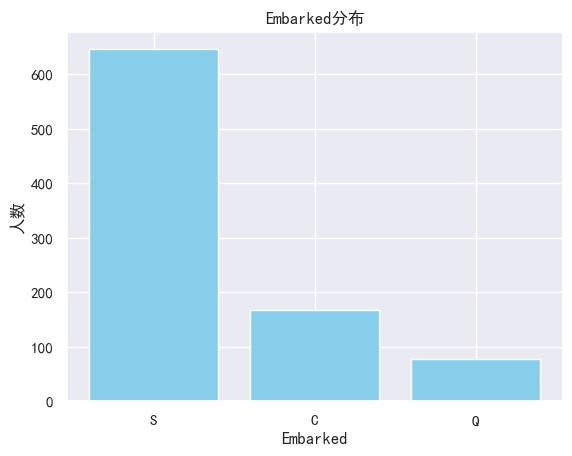

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [74]:
# 查看Embarked分布
import matplotlib.pyplot as plt

# 计算不同取值的频数
embarked_counts = train_data['Embarked'].value_counts()

# 绘制直方图
plt.bar(embarked_counts.index, embarked_counts.values, color='skyblue')
plt.xlabel('Embarked')
plt.ylabel('人数')
plt.title('Embarked分布')

plt.show()

print(embarked_counts)

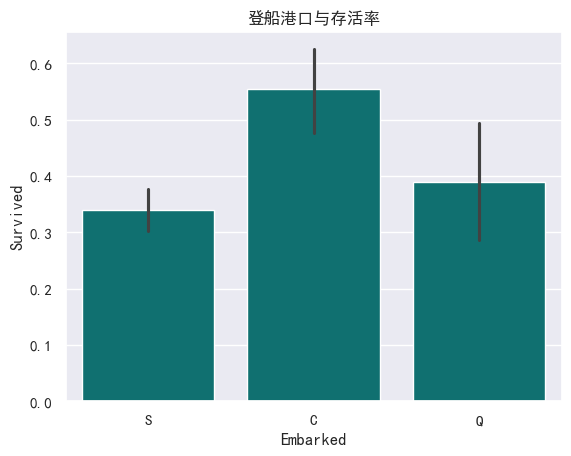

In [75]:
# Survived 与 Embarked 的关系
sns.barplot(x='Embarked', y='Survived', data=train_data, color="teal")
plt.title('登船港口与存活率')
plt.show()

编码数据处理

In [76]:
dataset = train_data._append(test_data,sort=False)

# 对Sex数据进行编码，男1女0
sexdict = {'male':1, 'female':0}
dataset.Sex = dataset.Sex.map(sexdict)

# 将Embarked, Pclass进行one_hot编码
embarked = pd.get_dummies(dataset.Embarked, prefix = 'Embarked')
dataset = pd.concat([dataset,embarked], axis = 1) # 将编码好的数据添加到原数据上
dataset.drop(['Embarked'], axis = 1, inplace=True) 

pclass = pd.get_dummies(dataset.Pclass, prefix = 'Pclass')
dataset = pd.concat([dataset,pclass], axis = 1) # 将编码好的数据添加到原数据上
dataset.drop(['Pclass'], axis = 1, inplace=True) 

dataset

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,NaN,1,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,NaN,0,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0,0,1,0,0,1
414,1306,NaN,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1,0,0,1,0,0
415,1307,NaN,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1,0,0,1
416,1308,NaN,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0,0,1,0,0,1


In [77]:
# 建立family_size特征：SibSp和Parch分别代表了兄弟姐妹和配偶数量，以及父母与子女数量。通过这两个数字，可以计算出该乘客的随行人数，作为新的特征
dataset['family'] = dataset.SibSp + dataset.Parch + 1
dataset

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,2
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,NaN,1,0,0,1,0,0,2
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,NaN,0,0,1,1,0,0,2
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0,0,1,0,0,1,1
414,1306,NaN,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1,0,0,1,0,0,1
415,1307,NaN,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1,0,0,1,1
416,1308,NaN,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0,0,1,0,0,1,1


In [78]:
# 去掉无关值：把没有帮助的列删除
dataset.drop(['Ticket'], axis = 1, inplace=True)
dataset.drop(['Name'], axis = 1, inplace=True)
dataset.drop(['Cabin'], axis = 1, inplace=True) # 缺失率太高
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   int64  
 3   Age          1223 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1308 non-null   float64
 7   Embarked_C   1309 non-null   uint8  
 8   Embarked_Q   1309 non-null   uint8  
 9   Embarked_S   1309 non-null   uint8  
 10  Pclass_1     1309 non-null   uint8  
 11  Pclass_2     1309 non-null   uint8  
 12  Pclass_3     1309 non-null   uint8  
 13  family       1309 non-null   int64  
dtypes: float64(3), int64(5), uint8(6)
memory usage: 99.7 KB


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,1,0.0,1,22.0,1,0,7.2500,0,0,1,0,0,1,2
1,2,1.0,0,38.0,1,0,71.2833,1,0,0,1,0,0,2
2,3,1.0,0,26.0,0,0,7.9250,0,0,1,0,0,1,1
3,4,1.0,0,35.0,1,0,53.1000,0,0,1,1,0,0,2
4,5,0.0,1,35.0,0,0,8.0500,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,1,NaN,0,0,8.0500,0,0,1,0,0,1,1
414,1306,NaN,0,39.0,0,0,108.9000,1,0,0,1,0,0,1
415,1307,NaN,1,38.5,0,0,7.2500,0,0,1,0,0,1,1
416,1308,NaN,1,NaN,0,0,8.0500,0,0,1,0,0,1,1


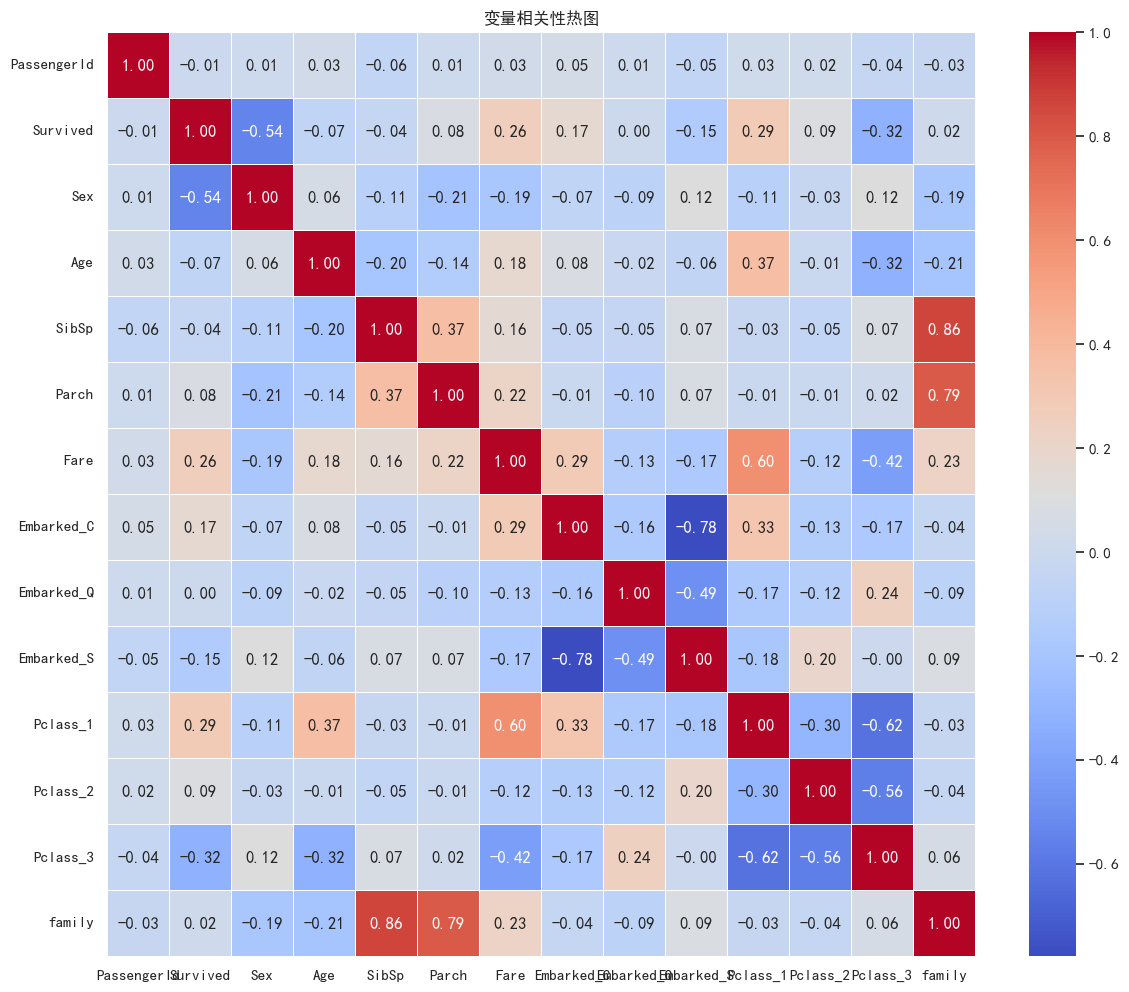

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataset.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('变量相关性热图')
plt.xticks(rotation=0)

plt.show()


训练集与测试集

In [80]:
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)
train = dataset[0:891]

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)
test = dataset.iloc[891:]

y_test = pd.read_csv('gender_submission.csv') # 测试集
y_test = np.squeeze(y_test)

C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\4169420440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(['Survived'], axis=1, inplace =True)
C:\Users\Lun\AppData\Local\Temp\ipykernel_11532\4169420440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(['Survived'], axis=1, inplace =True)


构建SVM和KNN模型

SVM

In [81]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC

alg_svm = SVC(C=2, kernel='rbf', gamma=10, decision_function_shape='ovr')

predictors_svm = ['Pclass_1', 'Sex', 'Fare', 'Embarked_C']

Kfold_svm = KFold(n_splits=3, shuffle=True, random_state=1)

test_accurate = cross_val_score(alg_svm, x_train[predictors_svm], y_train, cv=Kfold_svm, scoring='accuracy').mean()
test_recall = cross_val_score(alg_svm, x_train[predictors_svm], y_train, cv=Kfold_svm, scoring='recall').mean()
test_F1_score_svm = cross_val_score(alg_svm, x_train[predictors_svm], y_train, cv=Kfold_svm, scoring='f1').mean()
test_AUC_ROC_svm = cross_val_score(alg_svm, x_train[predictors_svm], y_train, cv=Kfold_svm, scoring='roc_auc').mean()

print("准确率：", test_accurate)
print("召回率：", test_recall)
print("F1-score：", test_F1_score_svm)
print("AUC-ROC：", test_AUC_ROC_svm)

准确率： 0.7575757575757575
召回率： 0.6625415193399764
F1-score： 0.6718549888066058
AUC-ROC： 0.7964851209639979


KNN

In [82]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

predictors_knn = ['Pclass_1', 'Sex', 'Fare', 'Embarked_C']

alg_knn = KNeighborsClassifier(n_neighbors=10)

Kfold_knn = KFold(n_splits=3, shuffle=True, random_state=1)

test_accurate, test_recall, test_F1_score_knn, test_AUC_ROC_knn = [], [], [], []

for train_index, test_index in Kfold_knn.split(x_train[predictors_knn]):
    train_predictors, train_target = x_train[predictors_knn].iloc[train_index], y_train.iloc[train_index]
    
    alg_knn.fit(train_predictors, train_target)
    
    test_predictions = x_train[predictors_knn].iloc[test_index]
    test_target = y_train.iloc[test_index]
    
    pre_train, pre_test = alg_knn.predict(train_predictors), alg_knn.predict(test_predictions)
    
    test_accurate.append(accuracy_score(test_target, pre_test))
    test_recall.append(recall_score(test_target, pre_test))
    test_F1_score_knn.append(f1_score(test_target, pre_test))
    test_AUC_ROC_knn.append(roc_auc_score(test_target, pre_test))

test_accurate = np.mean(test_accurate)
test_recall = np.mean(test_recall)
test_F1_score_knn = np.mean(test_F1_score_knn)
test_AUC_ROC_knn = np.mean(test_AUC_ROC_knn)

print("准确率：", test_accurate)
print("召回率：", test_recall)
print("F1-score：", test_F1_score_knn)
print("AUC-ROC：", test_AUC_ROC_knn)

准确率： 0.7620650953984286
召回率： 0.6326339742157862
F1-score： 0.6702315089812023
AUC-ROC： 0.7384182006057546
